In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

In [3]:
# import data - movies with column of movie name
# data source: https://www.kaggle.com/datasets/dikshabhati2002/walt-disney-movies/

movies=pd.read_csv('walt_disney_movies.csv')

# data cleaning (1/ remove unrelated column on CSV directly 2. check for outliers 3. drop null value)
# some of the low value (for budget and boxoffice) are showing exceptionally low (few dollars to hundred), 
# which seems unlikely for Disney production movies, exlcuding extremly low value through try and error

q_bolow = movies["BoxOffice"].quantile(0.01)
q_blow  = movies["Budget"].quantile(0.1)
nmovies = movies[(movies["BoxOffice"] > q_bolow) &(movies["Budget"] > q_blow)].dropna()

# for checking
# print(movies.describe())
# nmovies.head(5)


In [4]:
# create dictionary which contain the numbers of prouduced movies of each year
# count with uncleaned data set as the null value or outliers of budget and boxoffice not affecting the production fact

movieyearcount= {}
count = 0
for movie in movies.iterrows():
    date = movies.loc[count]['ReleaseDate']
    if date is not None: 
        year = int(str(date)[:4])
        count += 1
        if year in movieyearcount:
            movieyearcount[year] += 1
        else:
            movieyearcount[year] = 1

# for checking
# print(movieyearcount)


In [5]:
# max, min, avg movie production per year
# count with uncleaned data set as the null value or outliers of budget and boxoffice not affecting the production fact

maxmoviey = 0
maxyear = [0]
minmoviey = 1000
minyear = [0]
moviecount= 0
yearcount = 0


# find the max value and min value and its year in movie release amount
def minandmaxyear_1():
    global maxmoviey, maxyear, minmoviey,minyear, moviecount, yearcount
    for key, item in movieyearcount.items():
        moviecount += item
        yearcount += 1
        if item > maxmoviey:
            maxmoviey = item
            maxyear[0] = key
        if item < minmoviey:
            minmoviey = item
            minyear[0] = key

            
# check if repeated min or max year in movie release amount
def minandmaxyear_2():
    global maxmoivey, maxyear, minmoviey,minyear
    for i, j in movieyearcount.items():
        if j == maxmoviey:
            if i != maxyear[0]:
                maxyear.append(i)
        if j == minmoviey:
            if i != minyear[0]:
                minyear.append(i)    


minandmaxyear_1()
minandmaxyear_2()

avgmovie = moviecount/yearcount

print(f'The year with most movie releases is {maxyear} with {maxmoviey} movie(s)')
print(f'The year with least movie releases is {minyear} with {minmoviey} movies(s)')
print(f'The average movie release per year is {avgmovie} ({moviecount} movies in {yearcount} years )')

# checking
# print(maxmoviey)
# print(maxyear)
# print(minmoviey)
# print(minyear)
# print(avgmovie)


The year with most movie releases is [2020] with 13 movie(s)
The year with least movie releases is [1943, 1944, 1947, 1949, 1951, 1952, 1987] with 1 movies(s)
The average movie release per year is 5.3875 (431 movies in 80 years )


<AxesSubplot:xlabel='Year'>

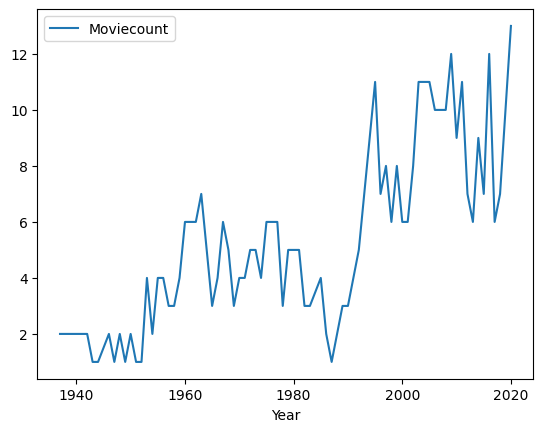

In [6]:
# Convert dictionary {year:release_movie_amount} to dataframe
# create line plot showing release amount in time series
yeardf = pd.DataFrame(movieyearcount.items(), columns=['Year', 'Moviecount'])
yeardf.plot(x = 'Year', y = 'Moviecount', kind = 'line')

For the running time, the average is 99.0352422907489, with standard deviation of 18.110247192411233,
the mximum is 168.0, and minimun of 61.0 mins
For the box office, the average is 212885464.4229075, with standard deviation of 277976536.0150505,
the mximum is 1450000000.0 for Frozen II, and minimun of 1000000.0 for The Sword and the Rose in US Dollars
If not excluding outlier with 1%, the highest box office is The Lion King with 1657000000.0 US Dollars
For the budget, the average is 63905484.581497796, with standard deviation of 70541219.3188793,
the mximum is 410600000.0, and minimun of 1350000.0 US Dollars
If not excluding outlier with 1%, the highest budget is Pirates of the Caribbean: On Stranger Tides with 410600000.0 US Dollars
For the IMDB, the average is 6.587665198237886, with standard deviation of 1.01333031627879,
the maximum is 8.5 with The Lion King, and minimun of 2.4 with Hannah Montana and Miley Cyrus: Best of Both Worlds Concert


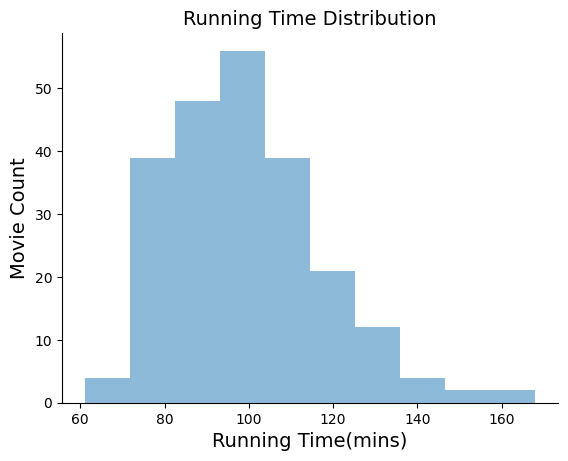

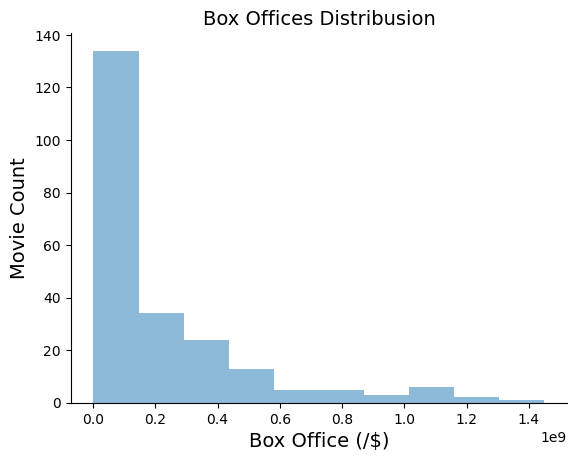

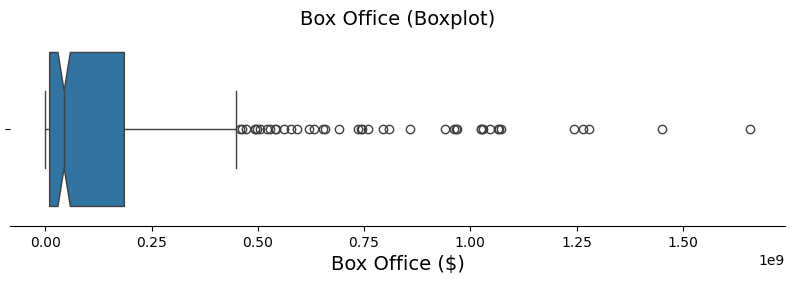

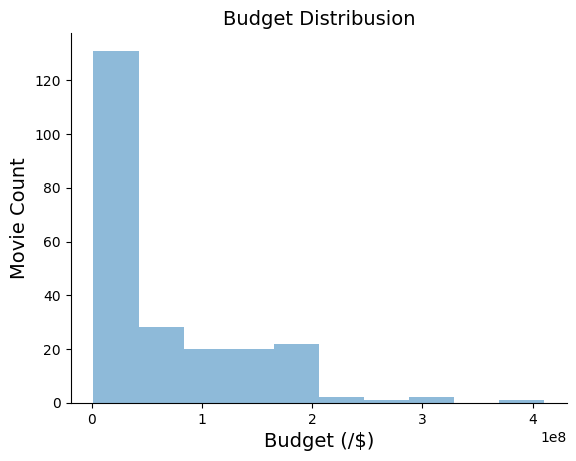

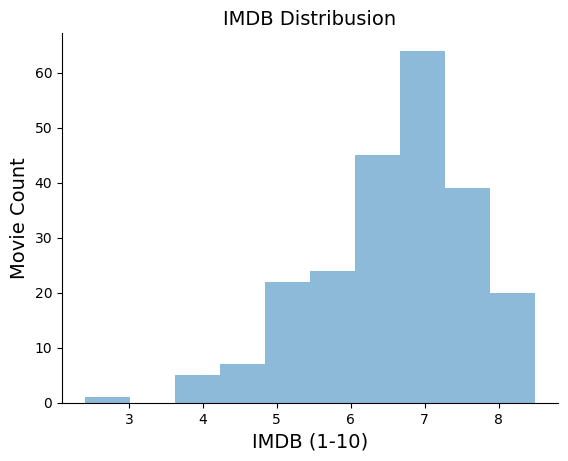

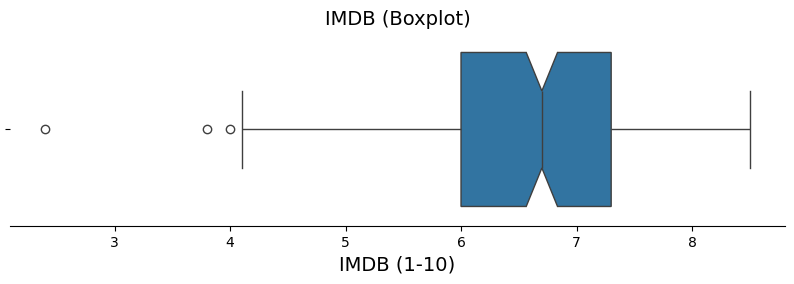

In [8]:
# plot and descriptive information for Running Time, Box Office, Budget, IMDB

#####################Running Time#######################
# histogram for running time
fig, ax = plt.subplots()
ax.hist(nmovies['RunningTime'], alpha = .5)
ax.set_title("Running Time Distribution", fontsize=14)
ax.set_xlabel("Running Time(mins)", fontsize=14)
ax.set_ylabel("Movie Count", fontsize=14)
sns.despine()

# Running time descriptive statistic
rstd = nmovies.RunningTime.std()
rmean = nmovies.RunningTime.mean()
rmax = nmovies.RunningTime.max()
rmin = nmovies.RunningTime.min()

print(f'For the running time, the average is {rmean}, with standard deviation of {rstd},')
print(f'the mximum is {rmax}, and minimun of {rmin} mins')

#####################BOX OFFICE#######################
# histogram for box office
fig, ax = plt.subplots()
ax.hist(nmovies['BoxOffice'], alpha = .5)
ax.set_title("Box Offices Distribusion", fontsize=14)
ax.set_xlabel("Box Office (/$)", fontsize=14)
ax.set_ylabel("Movie Count", fontsize=14)
sns.despine()

# boxplot for box office (with extrem value)
fig, axs = plt.subplots(figsize=(10, 2.5))
ax = sns.boxplot(x=movies["BoxOffice"], notch=True)
ax.set_xlabel('Box Office ($)', fontsize=14)
ax.set_title('Box Office (Boxplot)', ha='center', fontsize=14)
sns.despine(left=True)

# Box office descriptive statistic
bostd = nmovies.BoxOffice.std()
bomean = nmovies.BoxOffice.mean()
bomax = nmovies.BoxOffice.max()
bomin = nmovies.BoxOffice.min()
bomaxmovie = nmovies.loc[nmovies['BoxOffice'] == bomax, 'title'].iloc[0]
bominmovie = nmovies.loc[nmovies['BoxOffice'] == bomin, 'title'].iloc[0]

# hight value when not excluding 
hbomax = movies.BoxOffice.max()
hbomaxmovie = movies.loc[movies['BoxOffice'] == hbomax, 'title'].iloc[0]

print(f'For the box office, the average is {bomean}, with standard deviation of {bostd},')
print(f'the mximum is {bomax} for {bomaxmovie}, and minimun of {bomin} for {bominmovie} in US Dollars')
print(f'If not excluding outlier with 1%, the highest box office is {hbomaxmovie} with {hbomax} US Dollars')

#####################BUDGET#######################
# histogram for budget
fig, ax = plt.subplots()
ax.hist(nmovies['Budget'], alpha = .5)
ax.set_title("Budget Distribusion", fontsize=14)
ax.set_xlabel("Budget (/$)", fontsize=14)
ax.set_ylabel("Movie Count", fontsize=14)
sns.despine()

# Budget descriptive statistic
bstd = nmovies.Budget.std()
bmean = nmovies.Budget.mean()
bmax = nmovies.Budget.max()
bmin = nmovies.Budget.min()

# hight value when not excluding 
hbmax = movies.Budget.max()
hbmaxmovie = movies.loc[movies['Budget'] == hbmax, 'title'].iloc[0]

print(f'For the budget, the average is {bmean}, with standard deviation of {bstd},')
print(f'the mximum is {bmax}, and minimun of {bmin} US Dollars')
print(f'If not excluding outlier with 1%, the highest budget is {hbmaxmovie} with {hbmax} US Dollars')

#####################IMDB#######################
# histogram for IMDB
fig, ax = plt.subplots()
ax.hist(nmovies['imdb'], alpha = .5)
ax.set_title("IMDB Distribusion", fontsize=14)
ax.set_xlabel("IMDB (1-10)", fontsize=14)
ax.set_ylabel("Movie Count", fontsize=14)
sns.despine()

# boxplot for IMDB
fig, axs = plt.subplots(figsize=(10, 2.5))
ax = sns.boxplot(x=nmovies["imdb"], notch=True)
ax.set_xlabel('IMDB (1-10)', fontsize=14)
ax.set_title('IMDB (Boxplot)', ha='center', fontsize=14)
sns.despine(left=True)

# Budget descriptive statistic
istd = nmovies.imdb.std()
imean = nmovies.imdb.mean()
imax = nmovies.imdb.max()
imin = nmovies.imdb.min()

imaxmovie = nmovies.loc[nmovies['imdb'] == imax, 'title'].iloc[0]
iminmovie = nmovies.loc[nmovies['imdb'] == imin, 'title'].iloc[0]

print(f'For the IMDB, the average is {imean}, with standard deviation of {istd},')
print(f'the maximum is {imax} with {imaxmovie}, and minimun of {imin} with {iminmovie}')



In [8]:
# run correlation 

nmovies.corr(method = 'pearson', numeric_only=True)

,RunningTime,Budget,BoxOffice,imdb
RunningTime,1.000000,0.363624,0.246306,0.172466
Budget,0.363624,1.000000,0.726380,0.213158
BoxOffice,0.246306,0.726380,1.000000,0.388013
imdb,0.172466,0.213158,0.388013,1.000000


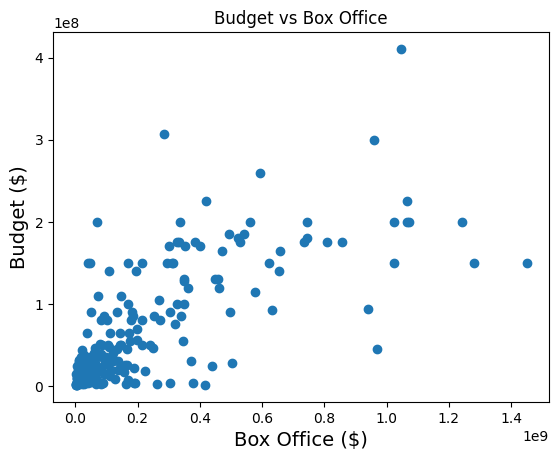

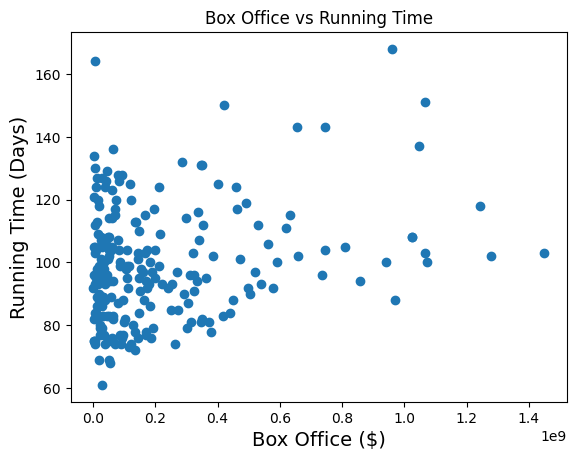

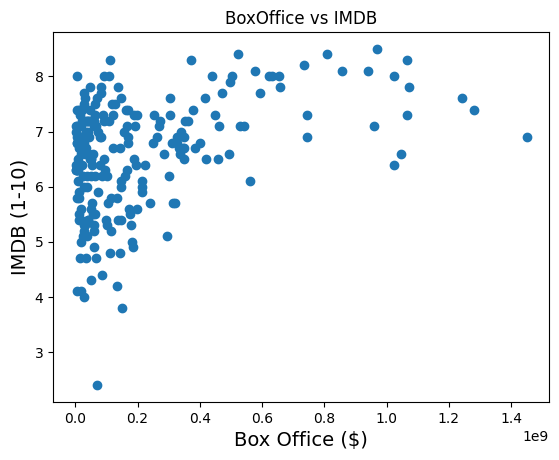

In [9]:
# Running Scatter Plot to identify relationship

fig, ax = plt.subplots()
ax.scatter(x=nmovies['BoxOffice'], y=nmovies['Budget'])
ax.set_xlabel("Box Office ($)", fontsize=14)
ax.set_ylabel("Budget ($)", fontsize=14)
ax.set(title="Budget vs Box Office")
plt.show()


fig, ax = plt.subplots()
ax.scatter(x=nmovies['BoxOffice'], y=nmovies['RunningTime'])
ax.set_xlabel("Box Office ($)", fontsize=14)
ax.set_ylabel("Running Time (mins)", fontsize=14)
ax.set(title="Box Office vs Running Time")
plt.show()

fig, ax = plt.subplots()
ax.scatter(x=nmovies['BoxOffice'], y=nmovies['imdb'])
ax.set_xlabel("Box Office ($)", fontsize=14)
ax.set_ylabel("IMDB (1-10)", fontsize=14)
ax.set(title="BoxOffice vs IMDB")
plt.show()

In [10]:
# test hypothesis with p value, alpha = 0.01. 
# test budget, with running time, imdb, box office


def ptest_hypothesis(col1,col2):
    global nmovies
    x = pearsonr(nmovies[col1], nmovies[col2])
    if x[1] < 0.01:
        print(f'{col1} and {col2} has signifiicant relationship with p-value {x[1]}, lower than 0.01')
    else:
        print(f'{col1} and {col2} has no signifiicant relationship.')

ptest_hypothesis('BoxOffice', 'RunningTime')
ptest_hypothesis('BoxOffice', 'imdb')
ptest_hypothesis('BoxOffice', 'Budget')


# additional test for budget and running time considering multicollinearity
ptest_hypothesis('Budget', 'RunningTime')


BoxOffice and RunningTime has signifiicant relationship with p-value 0.00017796119255926207, lower than 0.01
BoxOffice and imdb has signifiicant relationship with p-value 1.4258771618660103e-09, lower than 0.01
BoxOffice and Budget has signifiicant relationship with p-value 1.6575245090313437e-38, lower than 0.01
Budget and RunningTime has signifiicant relationship with p-value 1.674610805780777e-08, lower than 0.01


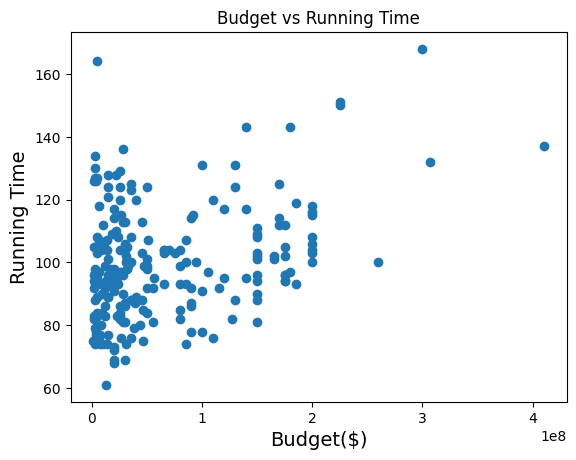

In [11]:
# base on previous multicollinearity
fig, ax = plt.subplots()
ax.scatter(x=nmovies['Budget'], y=nmovies['RunningTime'])
ax.set_xlabel("Budget($)", fontsize=14)
ax.set_ylabel("Running Time(mins)", fontsize=14)
ax.set(title="Budget vs Running Time")
plt.show()
